In [ ]:
# Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.
# Determine the number of clusters using the elbow method.
# Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
num_df = df.select_dtypes(include=[np.number])

In [6]:
num_df = num_df.dropna()

In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(num_df)

In [18]:
intertia = []
k = range(1, 11)

In [19]:
for _ in k:
    kmeans = KMeans(n_clusters = _, random_state = 42, n_init=10)
    kmeans.fit(x_scaled)
    intertia.append(kmeans.inertia_)


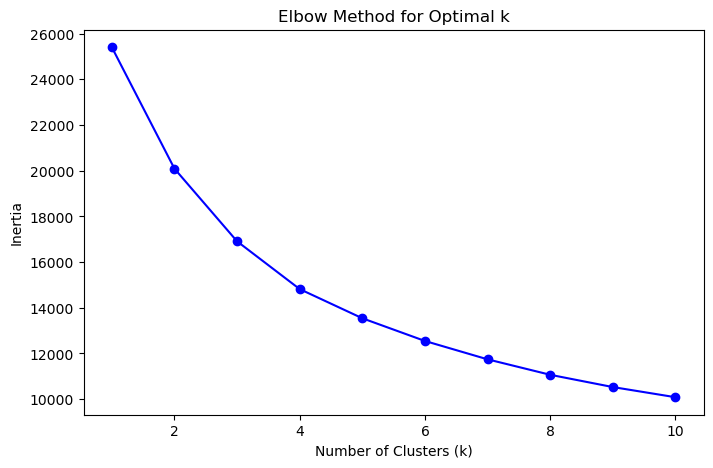

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(k, intertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [21]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(x_scaled)

In [23]:
df["KMeans_Cluster"] = clusters
print("\nKMeans cluster counts:")
print(df['KMeans_Cluster'].value_counts())


KMeans cluster counts:
KMeans_Cluster
1    1183
2     906
0     734
Name: count, dtype: int64


In [24]:
linked = linkage(x_scaled, method = "ward")

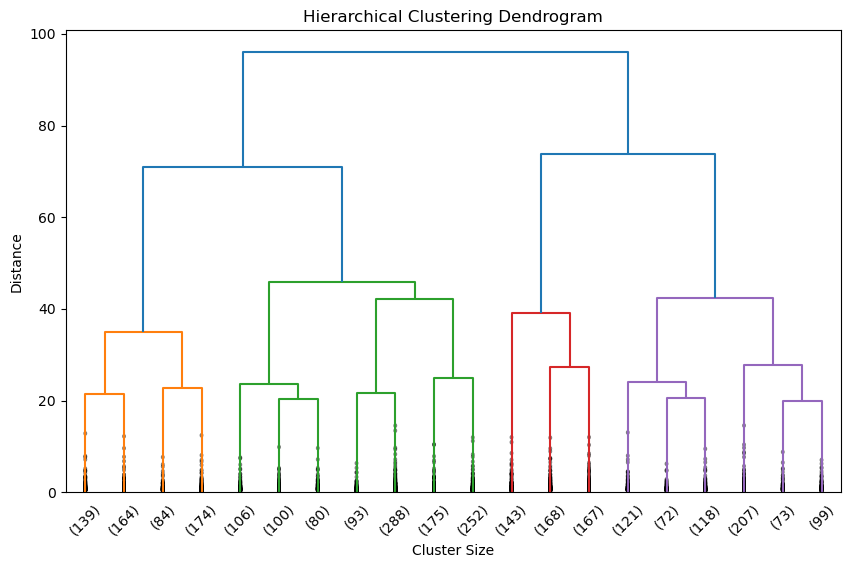

In [29]:
plt.figure(figsize = (10, 6))
dendrogram(linked, truncate_mode='lastp', p =20, leaf_rotation=45, leaf_font_size = 10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [30]:
hc_clusters = fcluster(linked, optimal_k, criterion="maxclust")
df['Hierarchical_Cluster'] = hc_clusters

In [31]:
print("\n hierarchical cluster counts:")
df['Hierarchical_Cluster'].value_counts()


 hierarchical cluster counts:


Hierarchical_Cluster
1    1655
3     690
2     478
Name: count, dtype: int64

In [33]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

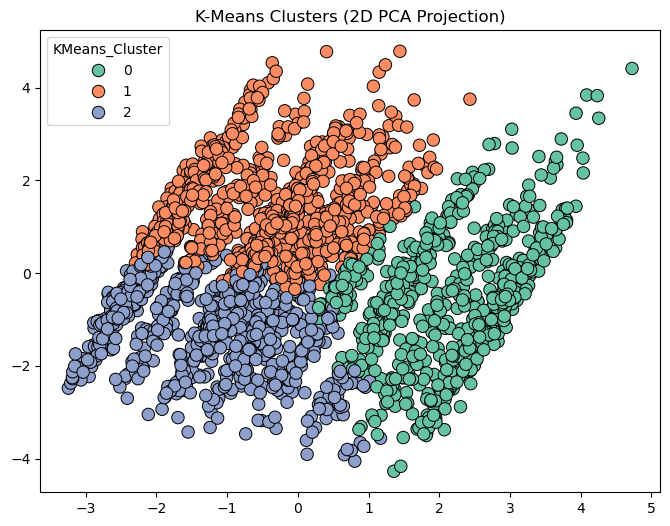

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = x_pca[:, 0], y = x_pca[:, 1], hue = df['KMeans_Cluster'], palette="Set2", s=80, edgecolor="k")
plt.title("K-Means Clusters (2D PCA Projection)")
plt.show()
          

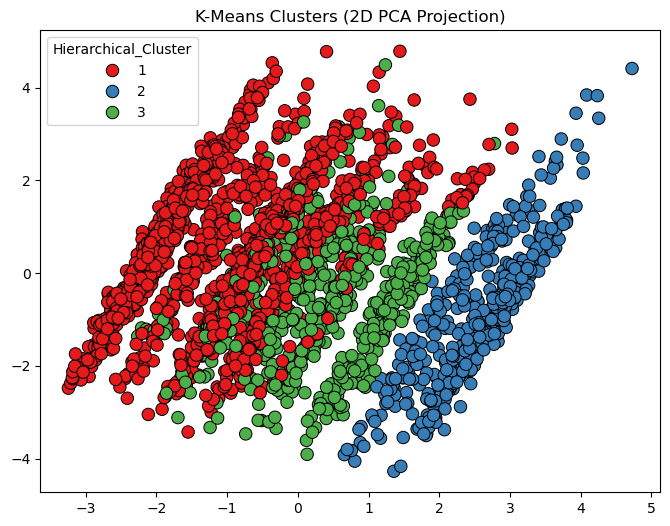

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:,0], y = x_pca[:,1], hue=df['Hierarchical_Cluster'], palette="Set1", s=80, edgecolor="k")
plt.title("K-Means Clusters (2D PCA Projection)")
plt.show()